In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist_train = pd.read_csv('datasets/mnist-in-csv/mnist_train.csv')
mnist_test = pd.read_csv("datasets/mnist-in-csv/mnist_test.csv")

In [3]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [4]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# extracting an image at index 1

img = mnist_train[1:2]
img = img.drop('label', axis=1)

In [6]:
img = img.values
img.shape

(1, 784)

In [7]:
img = img.reshape(1, 28, 28)

img.shape

(1, 28, 28)

In [8]:
# squeeze function will eliminate those dimensions which have just single values

img = img.squeeze()

img.shape

(28, 28)

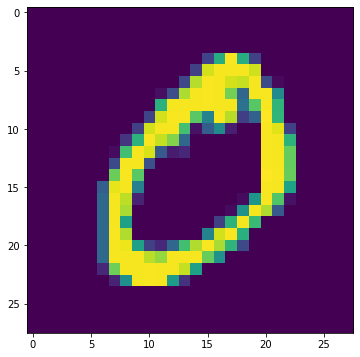

In [9]:
plt.figure(figsize= (6, 6))
plt.imshow(img)

## Cleaning of data

In [10]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

In [11]:
mnist_train_features = mnist_train.drop('label', axis=1)
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_target = mnist_test['label']

In [12]:
# Look at how pixel intensity data is stored in the dataframe

print("train max - ", mnist_train.values.max())
print("train min - ", mnist_train.values.min())
print("test max - ", mnist_test.values.max())
print("test min - ", mnist_test.values.min())

train max -  255
train min -  0
test max -  255
test min -  0


In [13]:
mnist_train = mnist_train.astype('float32')

mnist_train = mnist_train / 255

In [14]:
mnist_test = mnist_test.astype('float32')
mnist_test = mnist_test / 255

In [15]:
print("train max - ", mnist_train.values.max())
print("train min - ", mnist_train.values.min())
print("test max - ", mnist_test.values.max())
print("test min - ", mnist_test.values.min())

train max -  1.0
train min -  0.0
test max -  1.0
test min -  0.0


In [17]:
import torch

In [21]:
# convert image data into tensors

X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [22]:
X_train_tensor.shape, Y_train_tensor.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [23]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([10000, 784]), torch.Size([10000]))

## Setting up a fully connected neural network

In [24]:
import torch.nn as nn

In [25]:
input_size = 784
output_size = 10

hidden1_size = 16
hidden2_size = 32

In [26]:
class Net(nn.Module):
    # code here
    def __init__(self):
        # code here
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        
        x = self.fc3(x)
        
        return torch.log_softmax(x, dim=-1)

## Training a fully connected neural network

In [27]:
model = Net()

In [28]:
# Want to run this model on GPU if one is available

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


In [29]:
# copy the model parameter over this device

model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [30]:
# Move training and test tensors along with corresponding labels

X_train_tensor = X_train_tensor.to(device)
x_test_tensor = x_test_tensor.to(device)

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [31]:
import torch.optim as optim

In [32]:
optimizer = optim.Adam(model.parameters())

loss_fn = nn.NLLLoss()

In [33]:
epochs = 500

In [34]:
for epoch in range(1, epochs + 1):
    # code here
    optimizer.zero_grad()
    Y_pred = model(X_train_tensor)
    
    loss = loss_fn(Y_pred, Y_train_tensor)
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch - %d, loss - %0.2f ' % (epoch, loss.item()))

Epoch - 10, loss - 2.26 
Epoch - 20, loss - 2.22 
Epoch - 30, loss - 2.18 
Epoch - 40, loss - 2.15 
Epoch - 50, loss - 2.11 
Epoch - 60, loss - 2.06 
Epoch - 70, loss - 2.01 
Epoch - 80, loss - 1.96 
Epoch - 90, loss - 1.90 
Epoch - 100, loss - 1.85 
Epoch - 110, loss - 1.79 
Epoch - 120, loss - 1.73 
Epoch - 130, loss - 1.67 
Epoch - 140, loss - 1.61 
Epoch - 150, loss - 1.55 
Epoch - 160, loss - 1.49 
Epoch - 170, loss - 1.43 
Epoch - 180, loss - 1.38 
Epoch - 190, loss - 1.32 
Epoch - 200, loss - 1.27 
Epoch - 210, loss - 1.22 
Epoch - 220, loss - 1.17 
Epoch - 230, loss - 1.13 
Epoch - 240, loss - 1.09 
Epoch - 250, loss - 1.05 
Epoch - 260, loss - 1.01 
Epoch - 270, loss - 0.97 
Epoch - 280, loss - 0.93 
Epoch - 290, loss - 0.90 
Epoch - 300, loss - 0.87 
Epoch - 310, loss - 0.84 
Epoch - 320, loss - 0.82 
Epoch - 330, loss - 0.79 
Epoch - 340, loss - 0.77 
Epoch - 350, loss - 0.75 
Epoch - 360, loss - 0.72 
Epoch - 370, loss - 0.70 
Epoch - 380, loss - 0.68 
Epoch - 390, loss - 0

In [35]:
# change the model to evaluation model (to turnoff operation that should only apply during training)

model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [37]:
# turn off gradient calculation when use model for prediction

with torch.no_grad():
    # code here
    correct = 0
    total = 0
    
    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    
    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()
    
    print("Accuracy: ", accuracy_score(predicted, y_test))
    print("Precision: ", precision_score(predicted, y_test, average='weighted'))
    print("Recall: ", recall_score(predicted, y_test, average='weighted'))

Accuracy:  0.8555
Precision:  0.8585691380685845
Recall:  0.8555
